In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_fn = '/project/jnovembre/data/external_public/DPGP3/Chr2L.maf.txt.gz'
maf = np.loadtxt(data_fn, dtype='float16')

In [4]:
print(maf.shape)

(23011544,)


In [3]:
n_nan = np.count_nonzero(np.isnan(maf))
f_nan = n_nan / len(maf)
print(f_nan)

0.29319992608927065


In [4]:
masked = np.isnan(maf)

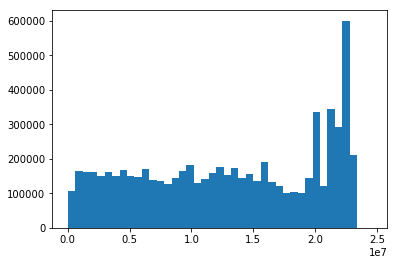

In [5]:
plt.hist(np.arange(len(maf))[masked], bins=np.arange(0,2.5e7,6e5))
plt.show()

# Old analysis

In [107]:
d = 5
#n_sites = len(maf)
start = 1000000 + 1
end = 15000000 + 1
n_sites = end - start
maf_pairs = np.empty((n_sites-d,2))
maf_pairs[:,0] = maf[start:end-d]
maf_pairs[:,1] = maf[start+d:end]

In [108]:
print(maf_pairs.shape)

(13999995, 2)


In [109]:
maf_pairs_safe = maf_pairs[~np.isnan(np.sum(maf_pairs,axis=1))]
print(maf_pairs_safe.shape)

(9678238, 2)


In [113]:
joint_sfs, x_edges, y_edges = np.histogram2d(maf_pairs_safe[:,0], maf_pairs_safe[:,1], bins=np.arange(51))
joint_sfs += joint_sfs.T
joint_sfs /= np.sum(joint_sfs)

In [114]:
print(joint_sfs)

[[  8.45034706e-01   3.04953236e-02   1.04507659e-02 ...,   2.15431776e-04
    2.21269615e-04   3.43140973e-04]
 [  3.04953236e-02   1.30312976e-03   4.33395004e-04 ...,   8.11098053e-06
    1.04357839e-05   1.22956265e-05]
 [  1.04507659e-02   4.33395004e-04   1.82677880e-04 ...,   3.66802304e-06
    3.51303615e-06   5.16622964e-06]
 ..., 
 [  2.15431776e-04   8.11098053e-06   3.66802304e-06 ...,   1.23989511e-06
    3.09973778e-07   2.06649186e-07]
 [  2.21269615e-04   1.04357839e-05   3.51303615e-06 ...,   3.09973778e-07
    1.13657052e-06   3.09973778e-07]
 [  3.43140973e-04   1.22956265e-05   5.16622964e-06 ...,   2.06649186e-07
    3.09973778e-07   2.27314104e-06]]


In [115]:
print(x_edges)
print(maf_pairs_safe[:10,:])

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.  29.
  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.  43.  44.
  45.  46.  47.  48.  49.  50.]
[[ 0.  0.]
 [ 1.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]]


In [116]:
marginal_sfs = np.sum(joint_sfs, axis=1)
print(marginal_sfs)
print(np.sum(marginal_sfs))

[  9.18526130e-01   3.35863305e-02   1.15682214e-02   6.06231217e-03
   3.86661291e-03   2.74827918e-03   2.13556435e-03   1.71534323e-03
   1.44251464e-03   1.22951099e-03   1.07777883e-03   9.52446096e-04
   8.64826841e-04   7.69664891e-04   7.22910513e-04   6.70214971e-04
   6.25940383e-04   5.89570126e-04   5.51391689e-04   5.16519639e-04
   4.89603583e-04   4.71935077e-04   4.38406247e-04   4.38612896e-04
   4.14589928e-04   3.91548544e-04   3.81474396e-04   3.61016127e-04
   3.57141455e-04   3.50218707e-04   3.19221329e-04   3.22424392e-04
   3.22941015e-04   3.03877627e-04   3.03877627e-04   2.91168702e-04
   2.89205535e-04   2.81249541e-04   2.75256715e-04   2.77788168e-04
   2.68437292e-04   2.69108902e-04   2.58828105e-04   2.59913013e-04
   2.65130905e-04   2.53145252e-04   2.49115593e-04   2.40333003e-04
   2.49632216e-04   3.82714292e-04]
1.0


In [117]:
global_sfs = np.histogram(maf[start:end][~np.isnan(maf[start:end])], bins=np.arange(51))[0]
global_sfs = global_sfs / np.sum(global_sfs)
print(global_sfs)

[  9.16508416e-01   3.42791085e-02   1.18361297e-02   6.22649070e-03
   3.97559744e-03   2.82601899e-03   2.19897620e-03   1.76614169e-03
   1.48155925e-03   1.26917999e-03   1.11314036e-03   9.82386270e-04
   8.89800835e-04   7.95677116e-04   7.45106047e-04   6.86170563e-04
   6.43867768e-04   6.06275966e-04   5.68203450e-04   5.33399787e-04
   5.08691109e-04   4.87443569e-04   4.50140195e-04   4.49851767e-04
   4.26489087e-04   4.00434411e-04   3.92454566e-04   3.73226023e-04
   3.68130459e-04   3.59862185e-04   3.29577230e-04   3.32846082e-04
   3.31788512e-04   3.13425253e-04   3.12559969e-04   3.01022843e-04
   2.97561705e-04   2.90254859e-04   2.83332583e-04   2.86120722e-04
   2.76218022e-04   2.75545023e-04   2.64969325e-04   2.67661321e-04
   2.73237598e-04   2.62661900e-04   2.56701051e-04   2.47759779e-04
   2.55258910e-04   3.93127565e-04]


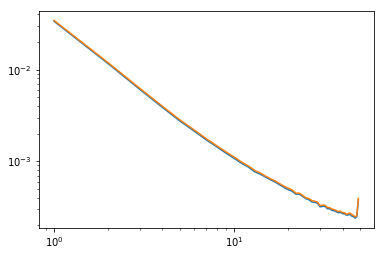

In [118]:
plt.loglog(np.arange(1,50), marginal_sfs[1:])
plt.loglog(np.arange(1,50), global_sfs[1:])
plt.show()

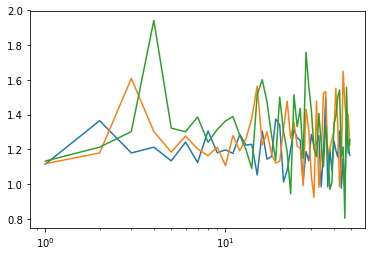

In [129]:
plt.semilogx(joint_sfs[2,:]/marginal_sfs/marginal_sfs[2])
plt.semilogx(joint_sfs[3,:]/marginal_sfs/marginal_sfs[3])
plt.semilogx(joint_sfs[4,:]/marginal_sfs/marginal_sfs[4])
#plt.colorbar()
plt.show()

In [74]:
print(np.diagonal(joint_sfs))

[  8.43948040e-01   1.22833081e-03   1.49510150e-04   4.03120150e-05
   1.67176297e-05   8.41809725e-06   5.69110800e-06   3.43837775e-06
   1.77847125e-06   2.48985975e-06   1.30421225e-06   1.06708275e-06
   1.06708275e-06   2.37129500e-07   1.18564750e-06   5.92823750e-07
   3.55694250e-07   4.74259000e-07   1.18564750e-07   1.18564750e-07
   2.37129500e-07   2.37129500e-07   3.55694250e-07   4.74259000e-07
   2.37129500e-07   2.37129500e-07   1.18564750e-07   0.00000000e+00
   2.37129500e-07   0.00000000e+00   1.18564750e-07   1.18564750e-07
   1.18564750e-07   1.18564750e-07   2.37129500e-07   0.00000000e+00
   1.18564750e-07   2.37129500e-07   0.00000000e+00   1.18564750e-07
   0.00000000e+00   0.00000000e+00   1.18564750e-07   0.00000000e+00
   2.37129500e-07   1.18564750e-07   0.00000000e+00   2.37129500e-07
   0.00000000e+00   2.37129500e-07]


In [75]:
print(np.diagonal(joint_sfs,offset=1))

[  3.06651127e-02   4.09700494e-04   7.48736396e-05   2.72698925e-05
   1.17971926e-05   6.58034362e-06   5.39469612e-06   2.60842450e-06
   1.77847125e-06   1.71918887e-06   1.00780037e-06   1.54134175e-06
   6.52106125e-07   4.74259000e-07   6.52106125e-07   4.14976625e-07
   4.14976625e-07   2.96411875e-07   2.37129500e-07   5.33541375e-07
   1.18564750e-07   5.92823750e-08   2.37129500e-07   2.37129500e-07
   2.37129500e-07   1.18564750e-07   2.37129500e-07   5.92823750e-08
   1.18564750e-07   0.00000000e+00   2.37129500e-07   1.77847125e-07
   1.77847125e-07   2.37129500e-07   1.18564750e-07   1.18564750e-07
   1.18564750e-07   0.00000000e+00   1.18564750e-07   1.18564750e-07
   1.77847125e-07   2.37129500e-07   1.18564750e-07   5.92823750e-08
   5.92823750e-08   0.00000000e+00   0.00000000e+00   0.00000000e+00
   2.37129500e-07]


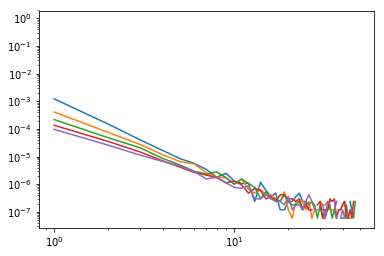

In [76]:
for i in range(5):
    plt.loglog(np.diagonal(joint_sfs,offset=i))
#plt.loglog(np.diagonal(joint_sfs,offset=1))
plt.show()

In [77]:
print(np.min(joint_sfs[joint_sfs>0]))

5.92823749942e-08


In [78]:
# Add pseudocounts
joint_sfs_no_zeros = joint_sfs
joint_sfs_no_zeros[joint_sfs==0.0] = 1.85e-8

In [79]:
I_matrix = joint_sfs * np.log2(joint_sfs_no_zeros / (marginal_sfs[:,None]*marginal_sfs[None,:]))

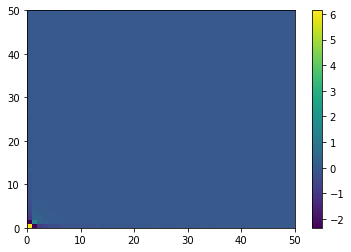

In [80]:
plt.pcolor(I_matrix*1e4)
plt.colorbar()
plt.show()

In [81]:
print(I_matrix*1e4)

[[  6.14254906e+00  -2.34760121e+00  -8.00983820e-01 ...,   4.77648841e-03
    1.93228729e-02  -1.26823725e-02]
 [ -2.34760121e+00   1.53071853e+00   3.28791193e-01 ...,  -3.94053453e-03
   -3.72797784e-03  -1.04454353e-02]
 [ -8.00983820e-01   3.28791193e-01   2.47613979e-01 ...,  -8.44369521e-03
   -5.05306127e-03   2.45351374e-03]
 ..., 
 [  4.77648841e-03  -3.94053453e-03  -8.44369521e-03 ...,   4.75112182e-03
   -3.21049341e-04   3.17000585e-03]
 [  1.93228729e-02  -3.72797784e-03  -5.05306127e-03 ...,  -3.21049341e-04
   -3.31949878e-04   3.03028482e-03]
 [ -1.26823725e-02  -1.04454353e-02   2.45351374e-03 ...,   3.17000585e-03
    3.03028482e-03   1.58888988e-03]]


In [82]:
print(np.sum(I_matrix)/(0.01**2))

1.29530016549


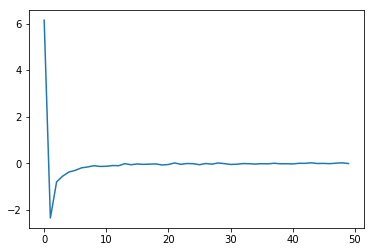

In [83]:
plt.plot(1e4*I_matrix[0,:])
plt.show()

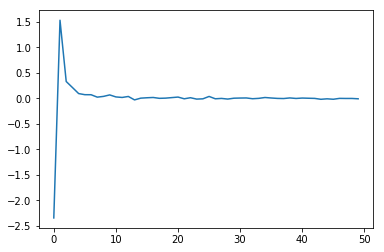

In [84]:
plt.plot(1e4*I_matrix[1,:])
plt.show()

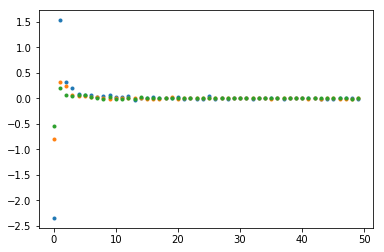

In [85]:
plt.plot(1e4*I_matrix[1,:],'.')
plt.plot(1e4*I_matrix[2,:],'.')
plt.plot(1e4*I_matrix[3,:],'.')
plt.show()

In [130]:
print(joint_sfs.shape)

(50, 50)


In [165]:
#d = 5
#n_sites = len(maf)
start = 1000000 + 1
end = 15000000 + 1
n_sites = end - start
joint_sfs = np.zeros((50,50))
for d in range(11,21):
    maf_pairs = np.empty((n_sites-d,2))
    maf_pairs[:,0] = maf[start:end-d]
    maf_pairs[:,1] = maf[start+d:end]
    joint_sfs += np.histogram2d(maf_pairs[:,0], maf_pairs[:,1], bins=np.arange(51))[0]
    #joint_sfs += np.histogram2d(maf_pairs_safe[:,0], maf_pairs_safe[:,1], bins=np.arange(51))[0]
joint_sfs += joint_sfs.T
joint_sfs /= np.sum(joint_sfs)

/home/dpr/miniconda3/envs/mmc_py35/lib/python3.5/site-packages/numpy/lib/function_base.py:973: RuntimeWarning: invalid value encountered in greater_equal
  not_smaller_than_edge = (sample[:, i] >= edges[i][-1])


In [166]:
marginal_sfs = np.sum(joint_sfs, axis=1)

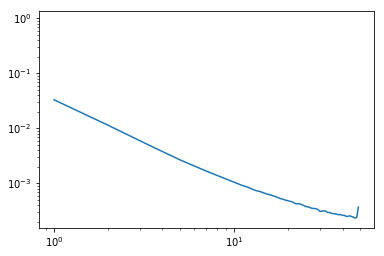

In [167]:
plt.loglog(marginal_sfs)
plt.show()

[[  1.29768740e+01  -3.52411649e+00  -1.64210815e+00 ...,  -6.04962760e-02
   -5.45305660e-02  -9.65936857e-02]
 [ -3.52411649e+00   1.65823374e+00   5.09272004e-01 ...,   1.00057723e-02
    9.81096050e-03   1.38801843e-02]
 [ -1.64210815e+00   5.09272004e-01   3.85941141e-01 ...,   5.66235337e-03
    4.39644640e-03   1.09793374e-02]
 ..., 
 [ -6.04962760e-02   1.00057723e-02   5.66235337e-03 ...,   7.28830950e-03
    2.26173149e-03   4.60082688e-03]
 [ -5.45305660e-02   9.81096050e-03   4.39644640e-03 ...,   2.26173149e-03
    4.85864433e-03   4.33783300e-03]
 [ -9.65936857e-02   1.38801843e-02   1.09793374e-02 ...,   4.60082688e-03
    4.33783300e-03   1.25084247e-02]]


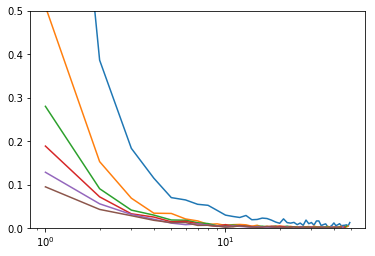

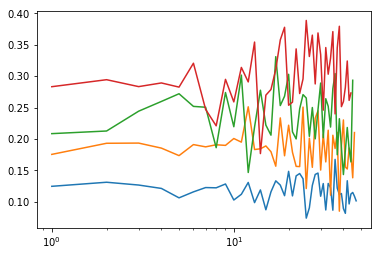

In [168]:
ratio = joint_sfs/(marginal_sfs[:,None]*marginal_sfs[None,:])
I_matrix = 1e4 * joint_sfs * np.log(ratio)
print(I_matrix)
plt.semilogx(np.diagonal(I_matrix, offset=0))
plt.semilogx(np.diagonal(I_matrix, offset=1))
plt.semilogx(np.diagonal(I_matrix, offset=2))
plt.semilogx(np.diagonal(I_matrix, offset=3))
plt.semilogx(np.diagonal(I_matrix, offset=4))
plt.semilogx(np.diagonal(I_matrix, offset=5))
plt.ylim([0,0.5])
plt.show()

for i in range(1,5):
    plt.semilogx(np.log(ratio[i,i+1:]))
plt.show()
#plt.pcolor(I_matrix)
#plt.colorbar()
#plt.show()

In [149]:
print(np.nansum(I_matrix))

3.85360715221


# Current analysis

In [14]:
n_sites = len(maf)
start = 1000000 + 1
end = 15000000 + 1
n_sites = end - start
x = np.arange(50)

Get joint site frequency spectra at different distances $d$, averaging over a $\Delta d = 10$ bases.

In [12]:
#d_list = np.arange(10,110,10,dtype='int')
d_list = [10, 100, 1000, 10000]
delta_d=10

#I = np.zeros(len(d_list))
Jsfs = np.zeros((len(d_list), 50, 50))
for i, d_start in enumerate(d_list):
    #jsfs = np.empty((50,50))
    for d in range(d_start,d_start+delta_d):
        pairs = np.empty((n_sites-d,2))
        pairs[:,0] = maf[start:end-d]
        pairs[:,1] = maf[start+d:end]
        pairs_safe = pairs[~np.isnan(np.sum(pairs,axis=1))]
        Jsfs[i,:,:] += np.histogram2d(pairs_safe[:,0], pairs_safe[:,1], bins=np.arange(51))[0]
    Jsfs[i,:,:] += Jsfs[i,:,:].T
    Jsfs[i,:,:] /= np.nansum(Jsfs[i,:,:])
    #msfs = np.sum(jsfs,axis=1)
    #I[i] = np.nansum(jsfs*np.log2(jsfs/(msfs[:,None]*msfs[None,:])))

Make sure that the marginal site frequency spectrum does not depend strongly on the distance $d$.

(4, 50)


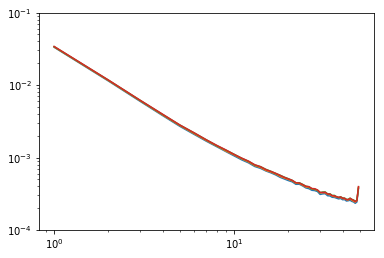

In [18]:
Msfs = np.sum(Jsfs,axis=1)
print(Msfs.shape)
plt.loglog(x,Msfs.T)
plt.ylim([1e-4,1e-1])
plt.show()

Calculate $\pi$ at each distance. Should be independent of $d$.

In [21]:
weights = 2*x*(100-x) / (1e4)
pi = np.sum(Msfs * weights[None,:], axis=1)
print(pi)

[ 0.0086179   0.00886341  0.00902426  0.00903081]


Calculate pointwise and total mutual informaton.

In [28]:
PMI = np.log2(Jsfs / (Msfs[:,:,None]*Msfs[:,None,:]))
MI = np.nansum(Jsfs*PMI, axis=(1,2))

Plot mutual information normalized by $\pi^2$.

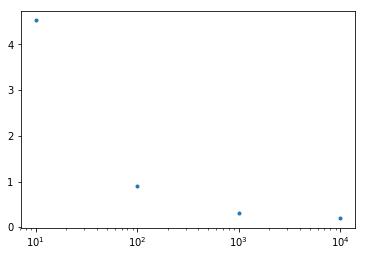

In [30]:
plt.semilogx(d_list, MI/pi**2, '.')
plt.show()

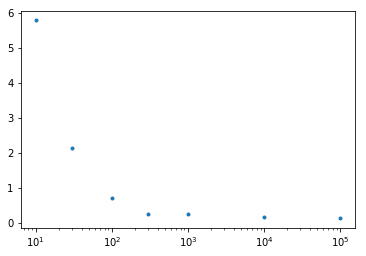

In [206]:
plt.semilogx(d_list, I*1e4, '.')
plt.show()

In [207]:
print(I*1e4)

[ 5.7793465   2.1222671   0.7078397   0.24687546  0.25590286  0.16394045
  0.12548658]


In [208]:
print(jsfs)

[[  8.40116250e-01   3.13855529e-02   1.08289394e-02 ...,   2.29389338e-04
    2.33854622e-04   3.66504811e-04]
 [  3.13855529e-02   1.17572369e-03   4.09035668e-04 ...,   8.42285415e-06
    8.95009618e-06   1.35976370e-05]
 [  1.08289394e-02   4.09035668e-04   1.42003853e-04 ...,   3.05930560e-06
    2.99421399e-06   4.55641260e-06]
 ..., 
 [  2.29389338e-04   8.42285415e-06   3.05930560e-06 ...,   6.50916092e-08
    5.85824475e-08   9.11282517e-08]
 [  2.33854622e-04   8.95009618e-06   2.99421399e-06 ...,   5.85824475e-08
    2.60366440e-08   1.36692378e-07]
 [  3.66504811e-04   1.35976370e-05   4.55641260e-06 ...,   9.11282517e-08
    1.36692378e-07   9.11282522e-08]]
